# Association Rule Mining 

### Association Rule Mining (Unsupervised Learning algorithm) searches for relationships, correlations, associations among sets of transactions. 
#### Support - Transactions containing a particular item divided by total number of transactions 
#### Confidence - (X==> Y) Likelihood of item Y being purchased when item X is purchased
#### Lift - Likelihood of Item Y being purchased when X is purchased 
#### Lift =1 --> No correlation, Lift <1 --> X and Y unlikely to be bought together, Lift >1 --> X and Y likely to be bought together 

In [3]:
import sys
#!{sys.executable} -m pip install mlxtend
# from apyori import apriori 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## Small Example on Association Rule mining | 20 transactions 

In [56]:
test = pd.read_csv("~/Downloads/retail_dataset copy.csv", sep=',')
test.head()

,0,1,2,3,4,5
0,A,B,C,D,NaN,NaN
1,G,C,D,E,B,NaN
2,A,C,G,H,K,NaN
3,E,C,D,B,K,NaN
4,D,E,F,H,L,NaN


In [57]:
test.shape 

(315, 6)

In [108]:
new_df = pd.DataFrame(test)[0:20].copy(deep=True)
new_df.head()

,0,1,2,3,4,5
0,A,B,C,D,NaN,NaN
1,G,C,D,E,B,NaN
2,A,C,G,H,K,NaN
3,E,C,D,B,K,NaN
4,D,E,F,H,L,NaN


In [70]:
new_df.shape 

(20, 6)

In [132]:
new_df.head() 
new_items = new_df['0'].unique()
print(new_items)
encoded_vals = []
for index, row in new_df.iterrows():
    labels = {}
    uncommons = list(set(new_items) - set(row))
    commons = list(set(new_items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
new_ohe_df = pd.DataFrame(encoded_vals)


['A' 'G' 'E' 'D' 'F' 'B' 'C' 'I' 'J' 'H' 'K']


In [133]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(new_ohe_df, min_support=0.3, use_colnames=True, verbose=0)
freq_items

,support,itemsets
0,0.50,(E)
1,0.45,(K)
2,0.40,(H)
3,0.40,(A)
4,0.55,(B)
5,0.60,(C)
6,0.70,(D)
7,0.30,"(B, E)"
8,0.40,"(D, E)"
9,0.30,"(A, D)"


#### So, the most frequent item sets are {A,D}, {B,E}, {D,E} and {B,C,D} as per Apriori. (item sets that have minimum support)
#### Note – Item sets {B,C}, {B,D}, {C,D} are ignored as they are already present in {B,C,D}. Also, a subset of frequent item sets must be a frequent item set. An itemset that doesn’t satisfy minimum support, none of its supersets will either (this is essential for pruning search space)


## Association Rules 
#### With minimum confidence of 75% 

In [110]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.74)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(E),(D),0.50,0.70,0.40,0.800000,1.142857,0.0500,1.500
1,(A),(D),0.40,0.70,0.30,0.750000,1.071429,0.0200,1.200
2,(B),(D),0.55,0.70,0.45,0.818182,1.168831,0.0650,1.650
3,(C),(D),0.60,0.70,0.45,0.750000,1.071429,0.0300,1.200
4,"(C, B)",(D),0.40,0.70,0.35,0.875000,1.250000,0.0700,2.400
5,"(C, D)",(B),0.45,0.55,0.35,0.777778,1.414141,0.1025,2.025
6,"(B, D)",(C),0.45,0.60,0.35,0.777778,1.296296,0.0800,1.800


### Explanation of Rule 1 
#### 50% of transactions contain purchase of E, 70% transactions have purchase of D, 
#### 40% of customers purchased both E and D 
#### Confidence that 80% of customers that bought E also bought D 
####  Likelihood of buying E and D is 1.14 times more than likelihood of buying only E

### Rules with Manual Calculations 

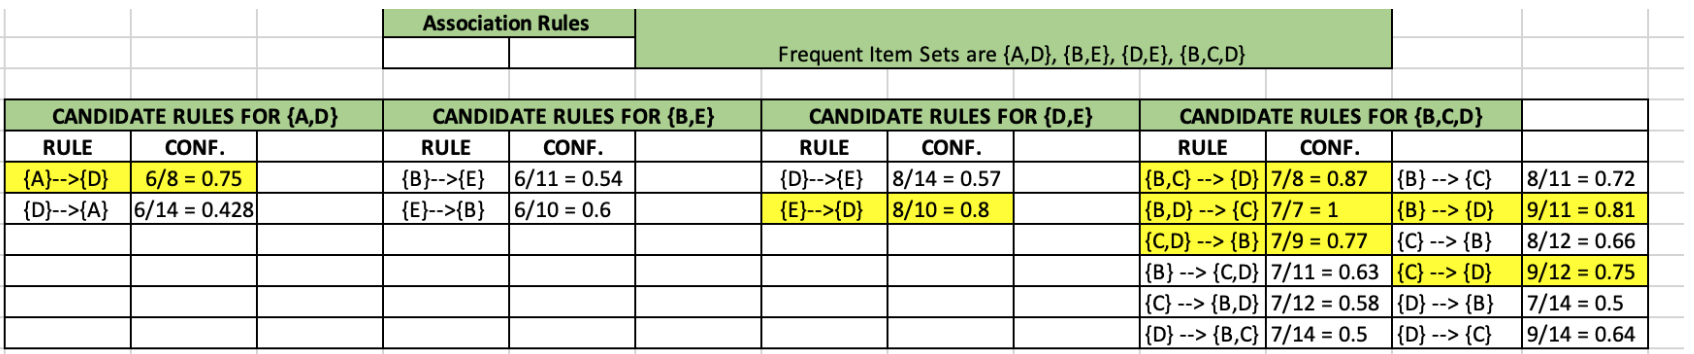

In [106]:
from IPython.display import Image
Image(filename='/Users/priyankaagrawal/Desktop/rules.png', width = 1000, height = 600)

# Association Rule Mining with large dataset 

In [113]:
df = pd.read_csv("~/Downloads/retail_dataset.csv", sep=',')
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [115]:
df.head() 
items = df['0'].unique()
print(items)
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

['Bread' 'Cheese' 'Meat' 'Eggs' 'Wine' 'Bagel' 'Pencil' 'Diaper' 'Milk']


In [123]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(ohe_df, min_support=0.25, use_colnames=True, verbose=0)
freq_items

,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.504762,(Bread)
3,0.361905,(Pencil)
4,0.406349,(Diaper)
5,0.438095,(Wine)
6,0.476190,(Meat)
7,0.438095,(Eggs)
8,0.501587,(Cheese)
9,0.279365,"(Milk, Bread)"


In [130]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.60)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
5,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
6,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
7,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203


#### Rule 1 - Lift = 1.20 --> Likelihood of buying milk and cheese is 1.2 times more than likelihood of buying only milk